In [1]:
#importing the librabries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Loading the data and adding the total deaths

data = pd.read_csv('States Data/22_cleaned.csv')
data['total_death'] = data['TN deaths'] + data['TX deaths']
data

,Unnamed: 0,Date,TN confirmed,TX confirmed,TN deaths,TX deaths,total_death
0,0,2020-01-22,0.0,0.0,0.0,0.0,0.0
1,1,2020-01-23,0.0,0.0,0.0,0.0,0.0
2,2,2020-01-24,0.0,0.0,0.0,0.0,0.0
3,3,2020-01-25,0.0,0.0,0.0,0.0,0.0
4,4,2020-01-26,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
371,433,2021-03-30,840.0,3672.0,29.0,109.0,138.0
372,434,2021-03-31,1313.0,122.0,10.0,0.0,10.0
373,435,2021-04-01,1770.0,7424.0,14.0,243.0,257.0
374,436,2021-04-02,0.0,3275.0,0.0,115.0,115.0


In [3]:
#Extracting the Data for month of June and July

week8_data = data[data['Date']>='2020-06-01']
week8_data = week8_data[week8_data['Date']<='2020-07-31']
week8_data = week8_data[:7*8]

### Inference 4

The task to plot the MAP values for the lambda paramter which is distributed as an exponential distribution. While the combined deaths in each states are distibuted as poisson distribution with parameter lambda. So, according to the data above it can be found out that the posterior follow gamma distribution and the results for the same are below:

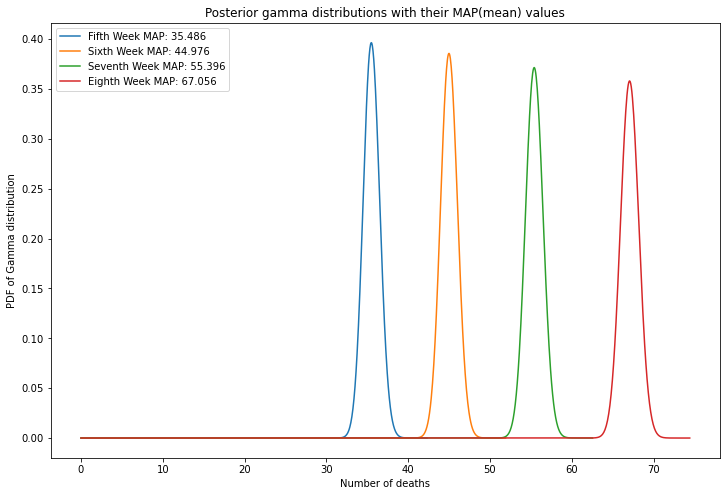

In [4]:
from scipy.stats import gamma

date=list(week8_data['Date'])
deaths=list(week8_data['total_death'])

def plot_gamma(alpha=1, beta=1, label="0"):
    #print((alpha-1)/beta)
    x = np.linspace(gamma.ppf(0, alpha, scale=1/beta),gamma.ppf(0.9999999999, alpha, scale=1/beta), 1000)
  
    plt.title("Posterior gamma distributions with their MAP(mean) values")
    label= label + "MAP: " + str(round(((alpha-1)/beta),3))
    plt.plot(x, gamma.pdf(x, alpha, scale=1/beta), label=label)
    plt.xlabel("Number of deaths")
    plt.ylabel("PDF of Gamma distribution")
    plt.legend()

plt.figure(figsize=(12,8))
plot_gamma(sum(deaths[:35])+1,len(deaths[:35]) + len(deaths[:35])/sum(deaths[:35]),'Fifth Week ')
plot_gamma(sum(deaths[:42])+1,len(deaths[:42]) + len(deaths[:42])/sum(deaths[:42]),'Sixth Week ') 
plot_gamma(sum(deaths[:48])+1,len(deaths[:48]) + len(deaths[:48])/sum(deaths[:48]),'Seventh Week ') 
plot_gamma(sum(deaths[:54])+1,len(deaths[:54]) + len(deaths[:54])/sum(deaths[:54]),'Eighth Week ')
plt.show()

From the above plot we can find the MAP values for the Lambda for the Fifth to Eighth week. So we can see that as we add more data to the model, the MAP values are increasing as the total number of deaths are increasing.